In [1]:
%matplotlib inline
import arrow
import pandas as pd
import urlparse
import random
import pymongo
import csv
import matplotlib.pyplot as plt

In [278]:
black_ids = set(['83aae6cb2b92fdc6db7406d315406c6b'])
black_hosts = set(['googleads.g.doubleclick.net'])

In [2]:
db = pymongo.MongoClient('mongodb://localhost:27017')['unicom']
filename = '/Users/chester/Downloads/20150629.csv'
f = open(filename, 'r')

In [7]:
# docs = db.unicom.find({'id':'905520b027ffa0a2645523668fdf73b1'},sort=[('time',1)])
with open('sample_records.csv', 'wb') as fw:
    csv_writer = csv.writer(fw)
    csv_writer.writerow(['id','hostname','url','time'])
    for doc in docs:
        csv_writer.writerow([doc['id'],doc['hostname'],doc['url'],doc['time']])

In [224]:
ids = list(id_set)
random.shuffle(ids)
sids = set(ids[:1000])

In [6]:
qtconsole

In [ ]:
import requests
f.seek(0)
csv_reader = csv.reader(f)
csv_reader.next() # skip headline
n = 0
s = []
data = []
url_set = set()
l = 0
for row in csv_reader:
    url = row[2]
    if (url in url_set):
        continue
    url_set.add(url)
    n +=1
    if n % 1000==0:
        db.fetchable.insert(data)
        l += len(data)
        print n,'/', l
        data = []
    parsed_url = urlparse.urlsplit(url)
    hn = parsed_url.hostname
    t = parsed_url.path.split('.')
    fmt = (len(t)>1 and t[-1]) or ''
    if fmt in set(['jpg','gif','png','js','css']):
        continue
    if not (hn and hn.split('.')[-1].isalpha()):
        continue

    try:
        res = requests.get(url, allow_redirects=False, timeout=1.0)
    except:
        pass
    else:
        if (res.status_code==200)and(res.headers.get('content-type'))and(res.headers.get('content-type').find('text/html')>-1):
            tmp = (len(res.text)>30 and res.text[:30] or res.text).strip().lower()
            if tmp.find('html')==-1:
                continue;
            doc = {
                    'url':url,
                    'hostname':hn,
                    'type':res.headers.get('content-type'),
#                     'content_brief':tmp
                }
            print url
            data.append(doc)
            

http://configuration.apple.com/configurations/pep/pipeline/pipeline0.html
http://3g.cn/
http://www.p6we.com/read.php?tid=1777299&fpage=2
http://www.baidu.com/
http://mcgw.alipay.com/sdklog.do
http://m.qfang.com/shanghai/rent/o8-f2
http://www.iqiyi.com/common/yingyinshare3.html
http://m.qfang.com/shanghai/rent?utm_source=baidu&utm_medium=cpc&utm_term=WAP-SH-rent-21006293058-%E4%B8%8A%E6%B5%B7%20%E7%A7%9F%E6%88%BF%E5%AD%90
http://www.midea.com/cn/Household_Products/fridge/fdlbx/
http://m.cndzys.com/liangxingyangsheng/xinlii/485923.html
http://m.qfang.com/shanghai/rent/qingpu-baihe/o8-f2
http://m.zufang.com/sh/
http://www.midea.com/cn/Household_Products/fridge/fdlbx/index_mo.shtml
http://changba.com/s/2xHReuz805Oyb5hbxisIkw??code=Gt1bjDM0qnHwFWcBjHFTGgOjW05pFzrp61EfLPUKIvGN6_IpWOo__MHFwMU_Dihlnu0SXboic-5n1c6TTgxlM21eEKZPWtpyh2-G5c3M7vG7rW4KwEI8Bd00MLcrjEED&from=singlemessage&isappinstalled=0
http://openapi.baidu.com/widget/social/like?app_id=2746015&third_source_id=2746015&url=http%3A%2F%

In [225]:
f.seek(0)
csv_reader = csv.reader(f)
csv_reader.next() # skip headline
n = 0
s = []
data = []
for row in csv_reader:
    n +=1
    if n % 1000000==0:
        print n
    if not row[1] in sids:
        continue
    hn = urlparse.urlsplit(row[2]).hostname
    if not (hn and hn.split('.')[-1].isalpha()):
        continue
    data.append([row[1], row[2], arrow.get(row[3]), hn])
    
#     if n>100000:
#         break
pds = pd.DataFrame(data=data, columns=['id','url','time','hostname'])
# pds['day'] = pds['time'].map(lambda x:x.day)
pds['hour'] = pds['time'].map(lambda x:x.hour)
pds['time_slot'] = pds['time'].map(lambda x:x.format('HH:mm'))
pds['hostname'] = pds['url'].map(lambda x:urlparse.urlsplit(x).hostname)

1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
21000000
22000000
23000000
24000000
25000000
26000000


count of id: 606
time stats:
2015-06-28T23:57:58.937000+00:00 2015-06-30T00:03:44.978000+00:00
20    30877
18    27354
17    26882
7     23863
19    23845
8     23572
12    22293
9     21664
10    21631
13    20390
11    19878
14    19516
22    17891
21    17616
16    17499
15    15178
23    12199
0      9992
1      9228
6      7381
2      6352
3      4374
4      4198
5      2493
dtype: int64
short.weixin.qq.com                       35754
mmsns.qpic.cn                             26729
q.qlogo.cn                                11296
mmbiz.qpic.cn                              7212
vs7.wxcu.u3.ucweb.com                      6405
szextshort.weixin.qq.com                   5273
m.baidu.com                                5173
inews.gtimg.com                            4897
proxy.music.qq.com                         4566
gspe19-cn.ls.apple.com                     4382
wx.qlogo.cn                                4304
adash.m.taobao.com                         4165
i.gtimg.cn                  

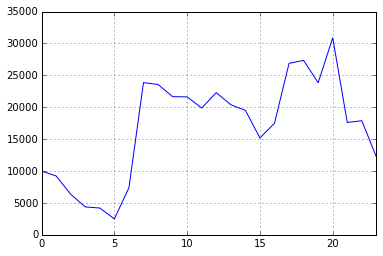

In [281]:
# pds = pds[pds.id !='83aae6cb2b92fdc6db7406d315406c6b']
print 'count of id:', pds.id.unique().size
print 'time stats:'
print pds.time.min(), pds.time.max()
print pds.hour.value_counts()
pds.hour.value_counts().sort_index().plot()
print pds.hostname.value_counts()


In [311]:
host_count = pds.hostname.value_counts()
with open('host_count.csv', 'wb') as fw:
    csv_writer = csv.writer(fw)
    csv_writer.writerow(['hostname','count'])
    for i in xrange(host_count.size):
        csv_writer.writerow([host_count.index[i],host_count[i]])

8b38647479cdf163dc4fbeb1a1c2eea3    31130
e0aba3ea68fd9971a4a8dc0b614f12a5    19276
b30b606d7af90708f78ef5b423f53a94    14608
418340bf43db8a76a281cec4895ea9cc     9866
e54f53daa846b09dd416312082c3ceec     5945
ab4437e29f6239ef939ed60df3184c4a     5379
a1d49e42c9d7ca7e012e79c6be9c8364     4576
f551497863b7dcbfb3d5d5e4c1713578     4554
d8aa37556d99f7cd6ee59882f5c37ba9     4428
aee64b0651906d94e22671846a825da1     4175
6e93d0f037b07f3a043ba7114113d025     4164
50a58176daf58a7f093619066c24e7b1     4092
db53fa302203813dc910aba4a085b854     3783
8130db63cd999037d682e0dc5ad27c52     3642
8ee95da5e0c83108f58b762a895063fc     3401
9893431469269f2413bf44f41273855d     3132
b00ab4b7ff57d3a70cec52356aae4a64     3094
8c47d212acf570ba25a526e0d77a9db0     3088
2b22a0ebfb9f1bad2898923823b4656d     3061
e14d3e4104e91d74adf86d53ab9ca6cf     3061
059b4544212ee0d7b00ef6f5544c8a7a     2933
5e816bef0d14f1cc728110a52335bd45     2851
b711a0da60e6e389b802732c31456b99     2830
8abea337e7e2d75a154212e4df72b232  

(array([ 307.,  100.,   44.,   41.,   29.,   27.,   14.,   10.,    4.,
           5.,    2.,    3.,    5.,    1.,    1.,    1.,    3.,    1.,
           2.,    0.]),
 array([    0.,   250.,   500.,   750.,  1000.,  1250.,  1500.,  1750.,
         2000.,  2250.,  2500.,  2750.,  3000.,  3250.,  3500.,  3750.,
         4000.,  4250.,  4500.,  4750.,  5000.]),
 <a list of 20 Patch objects>)

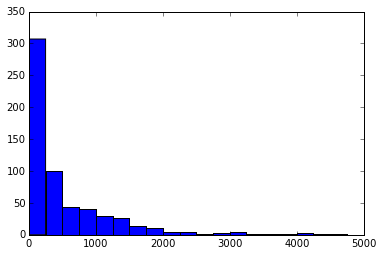

In [305]:
res = pds.id.value_counts()
print res
target_id = res.index[0]
print pds[pds.id==target_id].hostname.value_counts()
plt.hist(res,bins=20, range=(0,5000))

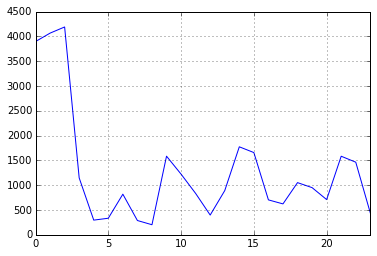

In [284]:
pds[(pds.id==target_id)].hour.value_counts().sort_index().plot()

00:00     49
00:01     10
00:02      4
00:03      6
00:04      1
00:05      3
00:06      3
00:07      4
00:08      6
00:09      8
00:10      8
00:11     39
00:12      6
00:13     22
00:14     29
00:15     35
00:16     12
00:17     10
00:18      4
00:19     29
00:20     80
00:21     45
00:22    127
00:23    134
00:24     90
00:25    109
00:26    183
00:27    101
00:28     86
00:29    163
        ... 
23:22     24
23:23      1
23:25      2
23:26      1
23:27      1
23:28     11
23:29      9
23:30      1
23:31     11
23:32      8
23:37      1
23:38     10
23:39      3
23:40      7
23:41      9
23:42      8
23:43      1
23:44      5
23:47      1
23:48     10
23:49      2
23:50      8
23:51      2
23:52      1
23:53      1
23:55     25
23:56      4
23:57      3
23:58     42
23:59     33
dtype: int64


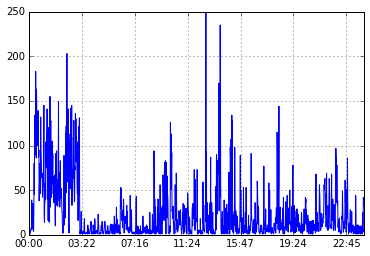

In [285]:
# ts = pds[(pds.id==target_id)&(pds.hostname=='mdap.alipay.com')].time_slot.value_counts().sort_index()
ts = pds[(pds.id==target_id)].time_slot.value_counts().sort_index()
ts.plot()
print ts

In [301]:
print pds[pds.id==target_id].sort('time').ix[:,['time_slot','hostname','url']][13150:13200]

        time_slot                     hostname  \
1408955     03:31             api.m.taobao.com   
1408627     03:31             api.m.taobao.com   
90456       03:31       eventlog.beacon.qq.com   
1408954     03:31             api.m.taobao.com   
1408622     03:31              h5.m.taobao.com   
1410470     03:32             api.m.taobao.com   
1408621     03:32              h5.m.taobao.com   
88935       03:32              tools.3g.qq.com   
1408626     03:32              h5.m.taobao.com   
86700       03:32       eventlog.beacon.qq.com   
92190       03:32       eventlog.beacon.qq.com   
1408599     03:32  httpdns.danuoyi.tbcache.com   
1410072     03:32         pdata.video.qiyi.com   
1410073     03:32         pdata.video.qiyi.com   
92645       03:32       eventlog.beacon.qq.com   
82332       03:32     resolver.gslb.mi-idc.com   
80703       03:32     resolver.gslb.mi-idc.com   
91453       03:32       eventlog.beacon.qq.com   
88611       03:32       eventlog.beacon.qq.com   


In [315]:
print pds.ix[(pds.hostname=='platform.readwater.net'), ['id','time_slot','url']].sort('time_slot')['url'][:10].tolist()

['http://platform.readwater.net/publicPay/payList?random=0.18269119531894273', 'http://platform.readwater.net/publicPay/install?random=0.47306423057028435', 'http://platform.readwater.net/publicPay/payList?random=0.18269119531894273', 'http://platform.readwater.net/publicPay/payList?random=0.18269119531894273', 'http://platform.readwater.net/publicPay/install?random=0.47306423057028435', 'http://platform.readwater.net/publicPay/install?random=0.47306423057028435', 'http://platform.readwater.net/publicPay/install?random=0.47306423057028435', 'http://platform.readwater.net/publicPay/install?random=0.47306423057028435', 'http://platform.readwater.net/publicPay/install?random=0.47306423057028435', 'http://platform.readwater.net/publicPay/payList?random=0.18269119531894273']


In [345]:
print pds.ix[(pds.hostname=='m.baidu.com')&(pds.id==target_id), ['url']].iloc[0:5].url.tolist()

['http://m.baidu.com/open/iasdk?cuid=A0C5DEB27DCE5AAABAD242F0B24BFD04%7C940119460160253&cua=720_1280_android_5.4.1.3_320&cut=6_4.4_17_iPhone&sdfrom=com.baidu.input&lcid=miiasdk', 'http://m.baidu.com/open/iasdk?cuid=A0C5DEB27DCE5AAABAD242F0B24BFD04%7C940119460160253&cua=720_1280_android_5.4.1.3_320&cut=6_4.4_17_iPhone&sdfrom=com.baidu.input&lcid=miiasdk', 'http://m.baidu.com/xcloudboss?r=config/publicsrv&type=issuedcode', 'http://m.baidu.com/static/searchbox/baiduboxapp/images/cardcenter/icon/push_weather.png', 'http://m.baidu.com/xcloudboss?r=config/distribute&pkgname=com.baidu.searchbox&ver=16786444&pu=cuid%401C1BF1ABF18E06E65744E6D8386CA8E7%257C940119460160253%2Cosname%40xcloud%2Ccua%40720_1280_android_6.2_320%2Ccut%406_4.4_17_iPhone%2Ccsrc%40app_moblie_txt%2Cctv%401']


In [182]:
print pds.ix[pds.hostname=='180.168.92.34',['url']].iloc[0].url

http://180.168.92.34:88/iclock/getrequest?SN=0025142401007


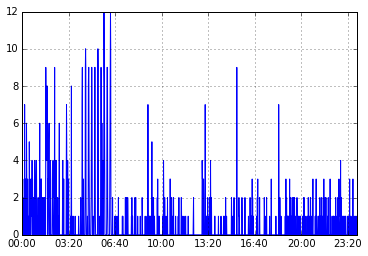

In [342]:


ts = pds[(pds.hostname=='eventlog.beacon.qq.com')&(pds.id==target_id)].time_slot.value_counts()
for hour in range(0,24):
    for m in range(0,60):
        ms = arrow.Arrow(2015,6,29,hour,m).format('HH:mm')
        if not ts.get(ms):
            ts[ms] = 0

ts.sort_index().plot()

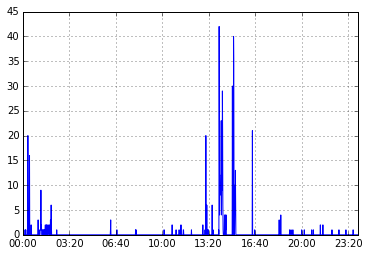

In [343]:
ts = pds[(pds.hostname=='m.baidu.com')&(pds.id==target_id)].time_slot.value_counts()
for hour in range(0,24):
    for m in range(0,60):
        ms = arrow.Arrow(2015,6,29,hour,m).format('HH:mm')
        if not ts.get(ms):
            ts[ms] = 0
ts.sort_index().plot()